Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection & Preprocessing

In [2]:
#loading the data from csv
car_dataset = pd.read_csv('/content/Project 7 Car Price Prediction.csv')

In [3]:
# first 5 rows
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [5]:
# getting some info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
#checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# checking the distribution the categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.owner.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.name.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: co

In [8]:
car_dataset.replace({"fuel":{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4},"owner":{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4},"transmission":{'Manual':0,'Automatic':1},"seller_type":{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [9]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


Splitting data into training & test data

In [10]:
X = car_dataset.drop(columns=['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [11]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,0,0
1,2007,50000,1,0,0,0
2,2012,100000,0,0,0,0
3,2017,46000,1,0,0,0
4,2014,141000,0,0,0,1


In [12]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [14]:
print(X_train.shape , X_test.shape , X.shape)

(3472, 6) (868, 6) (4340, 6)


Model Training

1. Linear Regression

In [15]:
#loading the kinear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
#prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error: ",error_score )

R Squared Error:  0.43922410637048914


Visualize the actual price and predicated prices

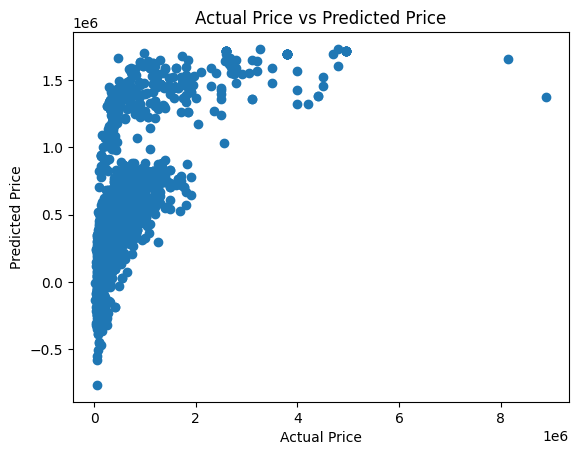

In [19]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

In [20]:
#prediction on Training Data
testing_data_prediction = lin_reg_model.predict(X_test)

In [21]:
error_score2 = metrics.r2_score(Y_test,testing_data_prediction)
print("R Squared Error: ",error_score2 )

R Squared Error:  0.49988298730549385


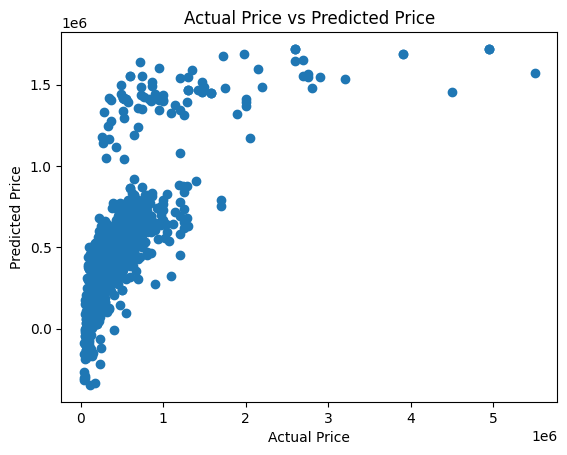

In [22]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

2.Lasso Regression

In [23]:
#loading the kinear regression model
las_reg_model = Lasso()

In [24]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [25]:
#prediction on Training Data
training_data_prediction = las_reg_model.predict(X_train)

In [26]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error: ",error_score )

R Squared Error:  0.4392241063188461


Visualize the actual price and predicated prices

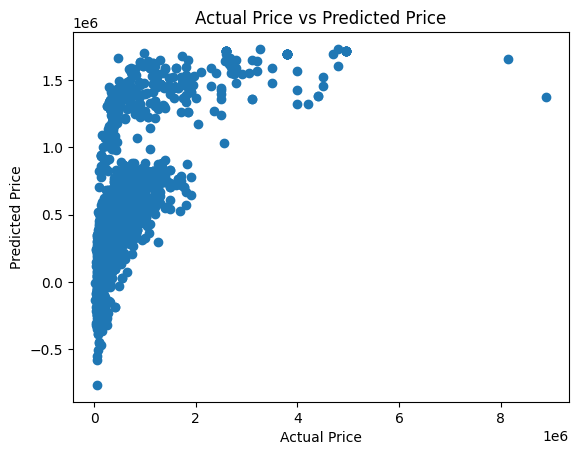

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

In [28]:
#prediction on Training Data
testing_data_prediction = las_reg_model.predict(X_test)

In [29]:
error_score2 = metrics.r2_score(Y_test,testing_data_prediction)
print("R Squared Error: ",error_score2 )

R Squared Error:  0.49988271066297707


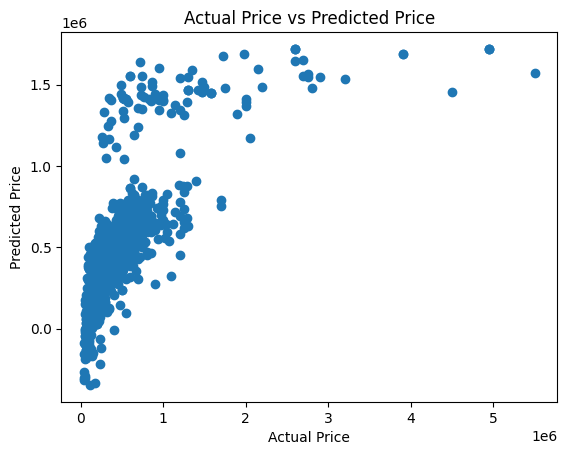

In [30]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

3. Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor(n_estimators = 500)

In [33]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

In [34]:
#predection on test data
test_data_prediction_rfr = regressor.predict(X_test)

In [35]:
# R squared error
error_score_rfr = metrics.r2_score(Y_test , test_data_prediction_rfr)
print('R Squared Error:', error_score_rfr)

R Squared Error: 0.7211515082310067


Predictive System

In [36]:
input_data=(2013,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])

The Predcited price of Car :  314496.8669869751


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
280000

280000

"fuel":'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4

"owner":'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4

"transmission":'Manual':0,'Automatic':1,

"seller_type" : Individual':0,'Dealer':1,'Trustmark Dealer':2

In [38]:
input_data=(2013,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = las_reg_model.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])

The Predcited price of Car :  314501.06134684384


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [39]:
input_data=(2013,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])

The Predcited price of Car :  277517.996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Saving The Model

In [40]:
import pickle
filename = "car_price_prediction_model.sav"
pickle.dump(regressor , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('car_price_prediction_model.sav','rb'))

In [41]:
input_data=(2013,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])

The Predcited price of Car :  277517.996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


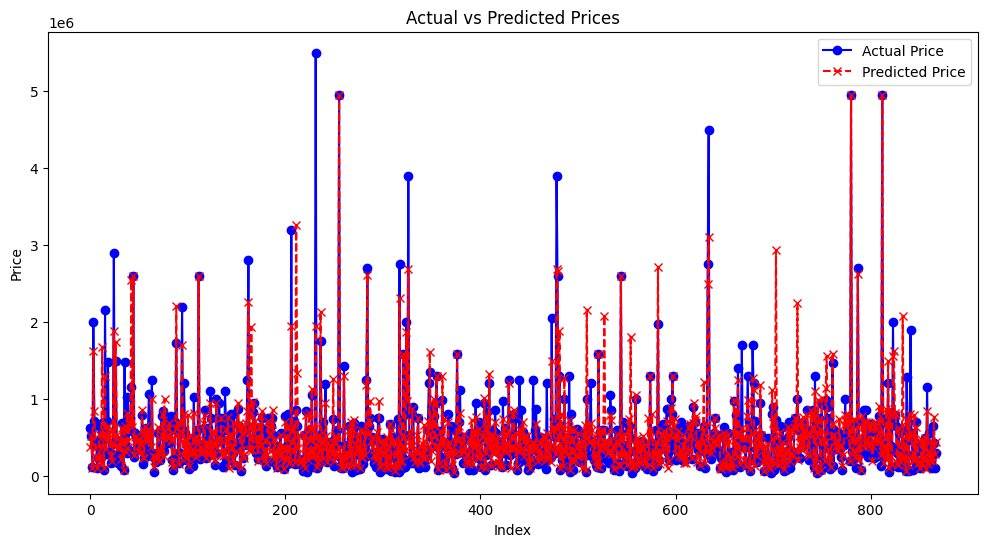

In [42]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, Y_test, color='blue', marker='o', linestyle='-', label='Actual Price')
plt.plot(indices, test_data_prediction_rfr, color='red', marker='x', linestyle='--', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


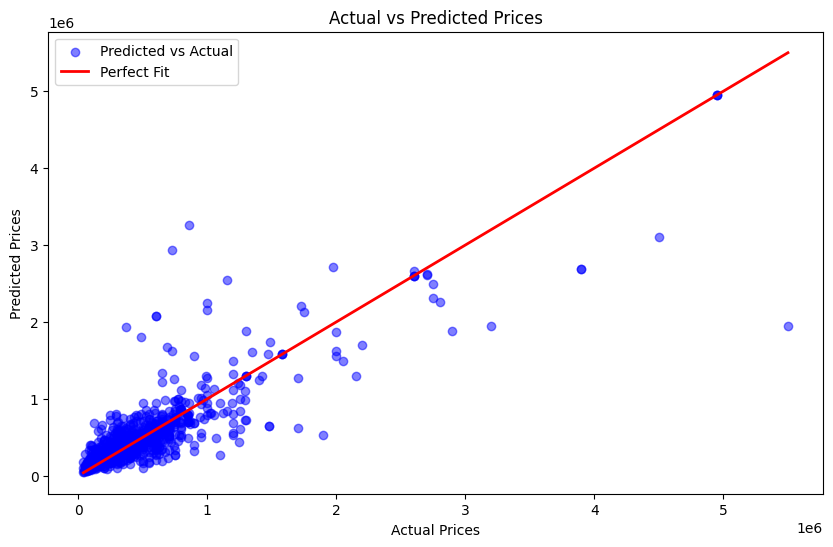

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction_rfr, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [44]:
!pip install scikit-learn==1.4.2